# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np


data = pd.read_csv('/Users/gabit/OneDrive/Desktop/Spring 2023/Data Analysis/assignment-5/data/tidal_wetland_estuaries.csv', na_values=-9999)


east_coast = data[data['land_longitude'] < -80]
west_coast = data[data['land_longitude'] > -120]

t_stat, p_val = ttest_ind(east_coast['soc_density'].dropna(), west_coast['soc_density'].dropna(), equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("The difference in soil organic carbon density between the East coast and West coast is statistically significant.")
else:
    print("There is not enough evidence to conclude that there is a difference in soil organic carbon density between the East coast and West coast.")

t-statistic: -2.6397807409107816
p-value: 0.009132108089101816
The difference in soil organic carbon density between the East coast and West coast is statistically significant.


I decided to used an indipented samples t-tes since I was looking at two Indipendent groups, which are the east and west coast. This is the best type of test to use when looking at the means of two groups.

This data includes most of the requirements for running a t test. However it does not inlcude the standard deviation which is also usually needed. 


## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [3]:
from utils import Linear_Reg_Diagnostic # do not change!
import pandas as pd


df = pd.read_csv('/Users/gabit/OneDrive/Desktop/Spring 2023/Data Analysis/assignment-5/data/tidal_wetland_estuaries.csv', na_values=-9999)
df.head()

,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421.0,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792.0,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268.0,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858.0,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644.0,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


In [4]:


X = df[['estu_dep', 'estu_perim' ,'land_area' ,'land_latitude' ,'land_longitude' ,'population' ,'tide_ht','estu_salinity', 'air_temp_mean' ,  'ocean_sst_mean' ,'ocean_diss_inorg_p', 'ocean_no3' , 'tide_flow', 'mean_precip' , 'mean_temp', 'soc_density']]
y = df['ocean_salinity_mean']


X.dropna(inplace=True)
y = y[X.index]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

from sklearn.metrics import r2_score

y_pred = model.predict(X)
print(f"R-squared value: {r2_score(y, y_pred)}")


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

print(model.summary())

Linear_Reg_Diagnostic(model)


C:\Users\gabit\AppData\Local\Temp\ipykernel_20604\1539030882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


R-squared value: 0.8978589252210987
                             OLS Regression Results                            
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.898
Model:                             OLS   Adj. R-squared:                  0.881
Method:                  Least Squares   F-statistic:                     53.29
Date:                 Wed, 10 May 2023   Prob (F-statistic):           9.17e-41
Time:                         16:30:27   Log-Likelihood:                -87.311
No. Observations:                  114   AIC:                             208.6
Df Residuals:                       97   BIC:                             255.1
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df2 = pd.read_csv('/Users/gabit/OneDrive/Desktop/Spring 2023/Data Analysis/assignment-5/data/coal-production.csv')
df2.head()

,year,electricity_prod
0,1960,45.904345
1,1961,45.730794
2,1962,46.411172
3,1963,46.599523
4,1964,46.102588


In [31]:
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2 = df2.set_index('year').sort_index()




Text(0, 0.5, 'Electricity')

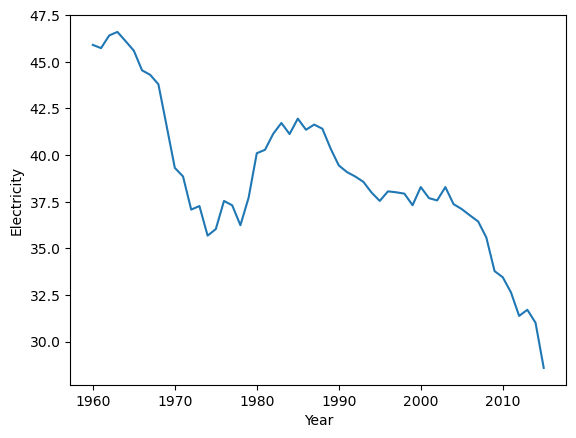

In [32]:
fig, ax = plt.subplots()
ax.plot(df2['electricity_prod']);
ax.set_xlabel('Year')
ax.set_ylabel('Electricity')

In [33]:
from statsmodels.tsa.stattools import adfuller

adfuller(df2)

(1.8721544326758233,
 0.9984818799941668,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 118.46409132638483)

In [35]:
from statsmodels.tsa.arima.model import ARIMA




In [36]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(df2['electricity_prod'])
auto_arima_model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Wed, 10 May 2023   AIC                            149.368
Time:                        17:08:31   BIC                            155.390
Sample:                    01-01-1960   HQIC                           151.697
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

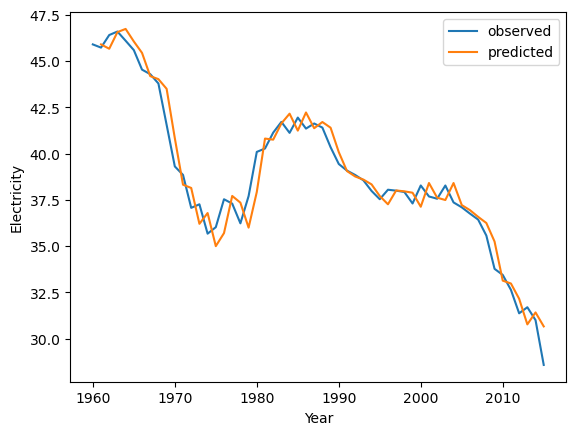

In [44]:
in_samp_pred = auto_arima_model.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=df2.index)

fig, ax = plt.subplots()
ax.plot(df2, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity')
ax.legend();



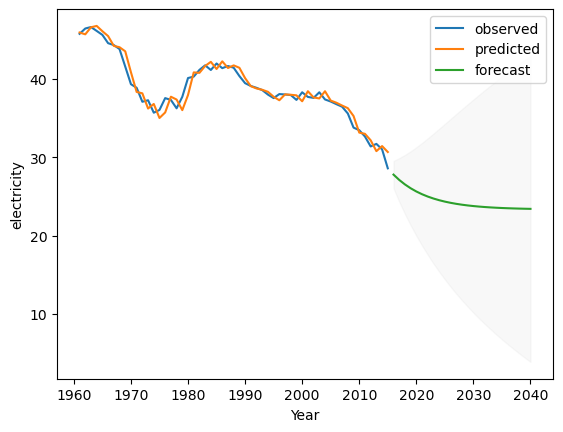

In [49]:
forecast, ci = auto_arima_model.predict(25, return_conf_int=True)
future_dates = pd.date_range(df2.index[-1], periods=26, freq='AS-JAN', inclusive='neither')

fig, ax = plt.subplots()
ax.plot(df2[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates, forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=.05)
ax.set_xlabel('Year')
ax.set_ylabel('electricity')
ax.legend();
